/tmp/ipython-input-457138319.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-10-29")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-457138319.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-10-29")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-457138319.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-10-29")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-457138319.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-10-29")
[*********************100%***********************]  1 of 1 completed
/tmp/ipy

📊 ETF績效摘要：
                 平均日報酬   年化報酬率  波動度(年化)  Sharpe比率(假設無風險利率=0)
Ticker   Code                                               
0050.TW  0050   0.0010  0.2740   0.2105               1.3019
0056.TW  0056   0.0006  0.1592   0.1538               1.0352
00692.TW 00692  0.0009  0.2616   0.1898               1.3787
00878.TW 00878  0.0006  0.1604   0.1429               1.1218


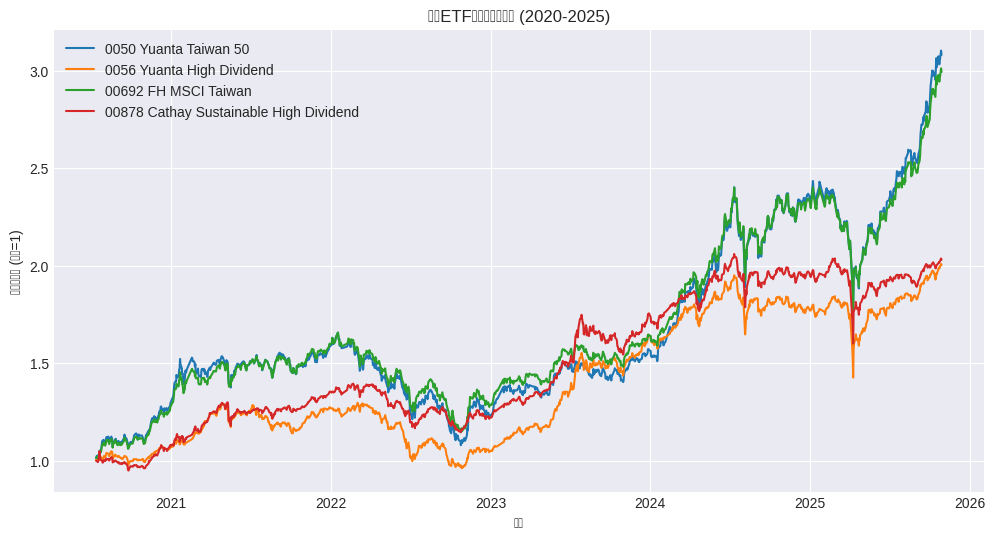

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37228 (\N{CJK UNIFIED IDEOGRAPH-916C}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) Liberatio

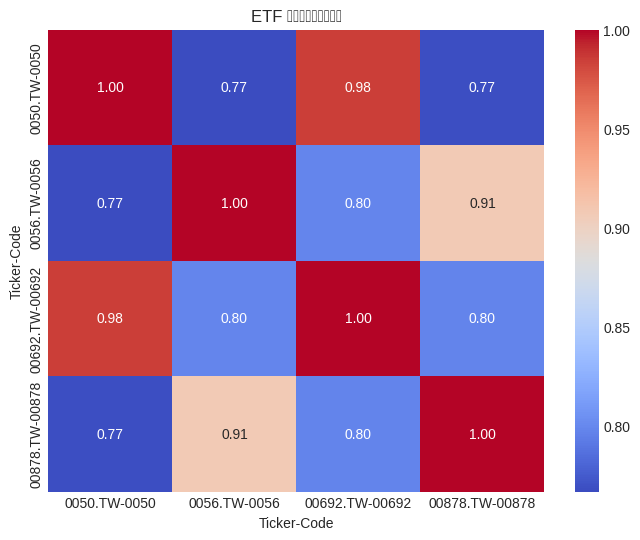

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定顯示樣式
plt.style.use('seaborn-v0_8-darkgrid')

# ====== 1️⃣ 設定台灣常見ETF清單 ======
etfs = {
    "0050": "Yuanta Taiwan 50",
    "0056": "Yuanta High Dividend",
    "00878": "Cathay Sustainable High Dividend",
    "00692": "FH MSCI Taiwan",
}

# ====== 2️⃣ 抓取Yahoo Finance歷史資料 ======
data = {}
for code in etfs:
    ticker = f"{code}.TW"  # Yahoo Finance 台股ETF代碼
    df = yf.download(ticker, start="2020-01-01", end="2025-10-29")
    df["Code"] = code
    df["Name"] = etfs[code]
    data[code] = df

# ====== 3️⃣ 合併資料 ======
all_data = pd.concat(data.values())
pivot_close = all_data.pivot_table(values="Close", index="Date", columns="Code")

# ====== 4️⃣ 計算報酬率 ======
returns = pivot_close.pct_change().dropna()
cumulative = (1 + returns).cumprod()

# ====== 5️⃣ 計算績效指標 ======
summary = pd.DataFrame({
    "平均日報酬": returns.mean(),
    "年化報酬率": (1 + returns.mean())**252 - 1,
    "波動度(年化)": returns.std() * (252 ** 0.5),
})
summary["Sharpe比率(假設無風險利率=0)"] = summary["年化報酬率"] / summary["波動度(年化)"]

print("📊 ETF績效摘要：")
print(summary.round(4))

# ====== 6️⃣ 視覺化比較 ======
plt.figure(figsize=(12, 6))
# Use the ticker symbols from the summary index for plotting
for ticker_code in summary.index:
    code = ticker_code[1] # Extract the code from the MultiIndex
    plt.plot(cumulative.index, cumulative[ticker_code], label=f"{code} {etfs[code]}")

plt.title("台灣ETF累積報酬率比較 (2020-2025)")
plt.xlabel("日期")
plt.ylabel("累積報酬率 (基準=1)")
plt.legend()
plt.show()

# ====== 7️⃣ 熱力圖分析 ======
plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("ETF 報酬率相關係數矩陣")
plt.show()